In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('/png/Information.csv',sep =',',encoding='euc-kr')

In [ ]:
print(data)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1182 entries, 0 to 1181
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   number       1182 non-null   object 
 1   address      1182 non-null   object 
 2   a            1182 non-null   float64
 3   b            1182 non-null   float64
 4   ground       1182 non-null   int64  
 5   Underground  983 non-null    float64
dtypes: float64(3), int64(1), object(2)
memory usage: 55.5+ KB


In [6]:
def get_a(i):
   z = data['a'][i]
   return z

In [7]:
def mov_avg_filter(x_n, x_meas):
  n = len(x_n)
  for i in range(n-1):
    x_n[i] = x_n[i+1]
  x_n[n-1] = x_meas
  x_avg = np.mean(x_n)
  return x_avg, x_n

In [8]:
len(data)

1182

In [9]:
n = 10
n_samples = 1182
time_end = 10

In [10]:
dt = time_end / n_samples
time = np.arange(0, time_end, dt)
x_meas_save = np.zeros(n_samples)
x_avg_save = np.zeros(n_samples)

In [ ]:
for i in range(n_samples):

    x_meas = get_a(i)
    
    if i == 0:
        x_avg, x_n = x_meas, x_meas * np.ones(n)
        print(x_meas * np.ones(n))
    else:
        x_avg, x_n = mov_avg_filter(x_n, x_meas)
        print(x_n)

    x_meas_save[i] = x_meas
    x_avg_save[i] = x_avg

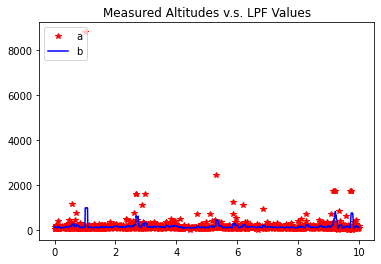

In [14]:
plt.plot(time, x_meas_save, 'r*', label='a')
plt.plot(time, x_avg_save, 'b-', label='b')
plt.legend(loc='upper left')
plt.title('Measured Altitudes v.s. LPF Values')
plt.savefig('/png')